In [6]:
#A_ch02_004_KNN.ipynb
#使用scikit-learn 實作 k-NN

In [7]:

import mglearn
X,y=mglearn.datasets.make_forge()

/Users/vivianvivi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
#import train_test_split() function
from sklearn.model_selection import train_test_split

In [9]:
#將資料分成訓練資料集(train)和評估用的測試資料集(test), train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [10]:
#檢視train及test dataset
print('len(X_train):',len(X_train),' len(X_test):',len(X_test))

len(X_train): 19  len(X_test): 7


In [11]:
#import scikit-learn 中的分類演算法模組, KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#使用 KNeighborsClassifier, 指定k=3, 建立分類器instance 'clf'
clf=KNeighborsClassifier(n_neighbors=5)

In [13]:
#1. train, 訓練
#以訓練資料集(X_train,y_train) fit (擬合/訓練) 模型
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
#2. predict, 預測
#2.1 先檢視 test dataset
X_test

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

In [15]:
#2. predict, 預測
#2.1 用測試資料集,以前式訓練(fit)過的模型 clf 做預測, 
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [16]:
#檢視測試資料集的 target
print(y_test)

[1 0 1 0 1 1 0]


In [17]:
#3. Evaluation, 評估
#以KNeighborsClassifier.score() function 做評估
print("Test set accuracy:")
clf.score(X_test,y_test)

Test set accuracy:


0.8571428571428571

In [13]:
#=============================================================
#分析 KNeighborsClassifier
#判別邊界(decision boundary),以k=1,k=3,k=9 來檢視判別邊界:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

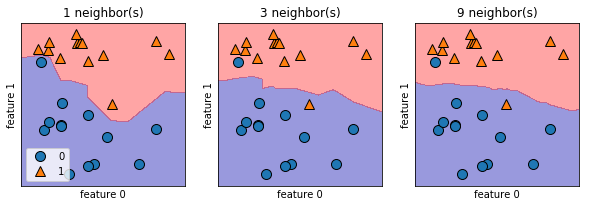

In [15]:
fig,axes=plt.subplots(1,3,figsize=(10,3)) #使用 subplots() 建立1x3個 subplot

for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

In [16]:
#k=1時, decision boundary 會貼著資料邊緣走, 形成一個複雜的模型
#k值越大, dicision boundary 會越平滑, 模型越單純

In [17]:
#===================================================================================
#以真實資料集(breast_cancer)實作kNN,討論 k 值與模型效能

In [18]:
#step1. 從 scikit-learn 載入 dataset 'breast_cancer'
from sklearn.datasets import  load_breast_cancer

In [19]:
#step1.1 以load_breast_cancer() 讀取資料
cancer_data=load_breast_cancer()

In [21]:
#step1.2 檢視 cancer_data
print(cancer_data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [22]:
#step2. 準備資料, 將資料集分為 train/test
#step2.1 import train_test_split() function
from sklearn.model_selection import train_test_split

In [24]:
#step2.2 將資料分成訓練資料集(train)和評估用的測試資料集(test)
#stratify=label, 用以確保split 比例中 label 比例 (也是 3:1) 
X_train,X_test,y_train,y_test=train_test_split(
    cancer_data.data,cancer_data.target,stratify=cancer_data.target,random_state=66)

In [25]:
#step2.3 檢視 train/test dataset 及比例
print('len(X_train):',len(X_train),' len(X_test):',len(X_test))

len(X_train): 426  len(X_test): 143


In [31]:
print('y_train.sum():',y_train.sum(),' y_test.sum():',y_test.sum())

y_train.sum(): 267  y_test.sum(): 90


In [32]:
#step3. 設定 k 值, 計算並記錄 對應的 'accuracy' (training accuracy, test accuracy)
training_accuracy=[] #empty list 'training_accuracy
test_accuracy=[]     #empty list 'test_accuracy

In [33]:
#設定 k 值(n_neighbors)由1到10
neighbors_settings=range(1,11)

In [34]:
#建立在各種 k 值(k=1~10)下的kNN模型:
for n_neighbors in neighbors_settings: #k=1~10
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)  #建立 KNeighborsClassifier 模型
    clf.fit(X_train,y_train)                           #以 train dataset fit model
    #計算並記錄train dataset的accuracy (記錄到 list 'training_accuracy')
    training_accuracy.append(clf.score(X_train,y_train))
    #計算並記錄test dataset的accuracy (記錄到 list 'test_accuracy')
    test_accuracy.append(clf.score(X_test,y_test))    

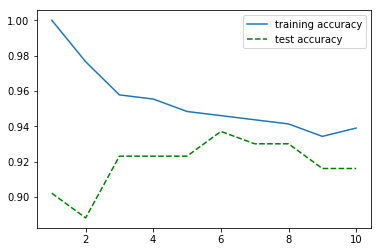

In [41]:
#step4. 將結果繪圖展示
plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,'g--',label='test accuracy')
plt.ylabel=("Accuracy")
plt.xlabel=("k value")
plt.legend()

In [38]:
#檢視並討論各種 k 值下 accuracy 與 overfitting 問題
for k,train_a,test_a in zip(neighbors_settings,training_accuracy,test_accuracy):
    print('k value:',k,' training accuracy:',train_a,' test accuracy:',test_a)

k value: 1  training accuracy: 1.0  test accuracy: 0.902097902098
k value: 2  training accuracy: 0.976525821596  test accuracy: 0.888111888112
k value: 3  training accuracy: 0.957746478873  test accuracy: 0.923076923077
k value: 4  training accuracy: 0.955399061033  test accuracy: 0.923076923077
k value: 5  training accuracy: 0.948356807512  test accuracy: 0.923076923077
k value: 6  training accuracy: 0.946009389671  test accuracy: 0.937062937063
k value: 7  training accuracy: 0.943661971831  test accuracy: 0.93006993007
k value: 8  training accuracy: 0.941314553991  test accuracy: 0.93006993007
k value: 9  training accuracy: 0.934272300469  test accuracy: 0.916083916084
k value: 10  training accuracy: 0.93896713615  test accuracy: 0.916083916084
